In [1]:
import matplotlib.pyplot as plt
from numpy import array, linspace

In [2]:
from astrocyte_model import *
from parameters import *
from run_model import *
from run_tests import *

Figure 3 with glutamatergic stimulation

In [12]:
### Simulation Parameters ###
dt = 0.01e-3
sample_rate = 1000
t_total = 100
compartment_to_monitor = array([1,2,3,4,5,6,7,8,9], dtype = int)


### Astrocyte Morphology ###
# Import astrocyte morphology model
points = read_from_swc('Morphology/Linear_9comparts.txt')
morp_params = calculate_morphological_parameters(points)
connection_matrix = build_connection_matrix(points)

# Get astrocyte morphology parameters
n_comparts = morp_params.shape[0]
A = morp_params[:,3]
Vol = morp_params[:,5]
ratio_ER = morp_params[:,6]


### Model Parameters ###
model_parameters = define_parameters()

# initialize model variables
model_parameters['IP3_rest']  = float(bissec_method(null_IP3, a = 0, b = 9e-3, p = model_parameters))
model_parameters['h_rest']    = float(null_h(p = model_parameters))
model_parameters['Ca_ERrest'] = float(null_ca_er(p = model_parameters))
model_parameters['g_Naleak']  = float(null_na_i(p = model_parameters))
model_parameters['g_Kleak']   = float(null_k_i(p = model_parameters))

p = create_numba_dictionary(model_parameters)


### Stimuli ###
# Glutamate Stimulation
stim_glu_types = tuple(['poisson'])
stim_glu_t_init = tuple([0])
stim_glu_t_end = tuple([600])
stim_glu_Hz = tuple([5])
stim_glu_comparts = ([7,8,9,],)
    
# Dopaminergic Stimulation
stim_DA_types = tuple(['none'])
stim_DA_t_init = tuple([0])
stim_DA_t_end = tuple([600])
stim_DA_Hz = tuple([10])
stim_DA_comparts = ([1,2,3,4,5,6,7,8,9],)


### Run simulation ###
Ca_i = solve_model_equations(dt, sample_rate, compartment_to_monitor, t_total, n_comparts, connection_matrix, p, 
                             A, Vol, ratio_ER,  stim_glu_types, stim_glu_t_init, stim_glu_t_end, stim_glu_Hz, 
                             stim_glu_comparts, stim_DA_types, stim_DA_t_init, stim_DA_t_end, stim_DA_Hz, stim_DA_comparts)

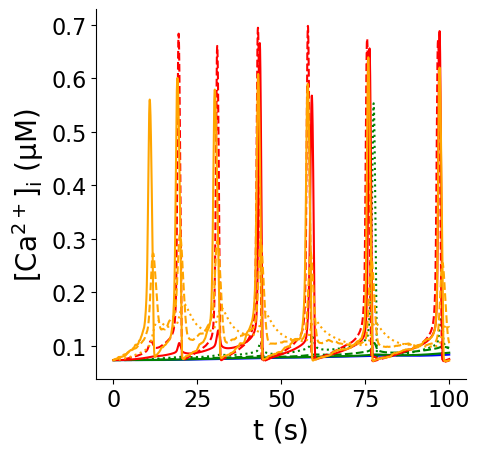

In [13]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

t = linspace(0, t_total, int(t_total/(dt*sample_rate)))

# line style
colors = ['b', 'g', 'g', 'g', 'r', 'r', 'orange', 'orange', 'orange']
ls = ['-', '-', '--', ':', '-', '--', '-', '--', ':']

labels = [1,2,3,4,5,6,7,8,9]
for i, ca_i in enumerate(Ca_i):
    ax.plot(t, 1000*ca_i, color = colors[i], ls = ls[i])
    
    
### Cosmetics ###
ax.tick_params(axis = 'both', which = 'both', labelsize = 16)
ax.set_xlabel('t (s)', fontsize = 20)
ax.set_ylabel(r'$\mathrm{[Ca^{2+}]_i~(\mu M)}$', fontsize = 20)

# Remove spines
for spine in ('top', 'right'): ax.spines[spine].set_visible(False)

## Figure 4 with dopaminergic stimulation

In [9]:
### Simulation Parameters ###
dt = 0.01e-3
sample_rate = 1000
t_total = 100
compartment_to_monitor = array([1,2,3,4,5,6,7,8,9], dtype = int)


### Astrocyte Morphology ###
# Import astrocyte morphology model
points = read_from_swc('Morphology/Linear_9comparts.txt')
morp_params = calculate_morphological_parameters(points)
connection_matrix = build_connection_matrix(points)

# Get astrocyte morphology parameters
n_comparts = morp_params.shape[0]
A = morp_params[:,3]
Vol = morp_params[:,5]
ratio_ER = morp_params[:,6]


### Model Parameters ###
model_parameters = define_parameters()

# initialize model variables
model_parameters['IP3_rest']  = float(bissec_method(null_IP3, a = 0, b = 9e-3, p = model_parameters))
model_parameters['h_rest']    = float(null_h(p = model_parameters))
model_parameters['Ca_ERrest'] = float(null_ca_er(p = model_parameters))
model_parameters['g_Naleak']  = float(null_na_i(p = model_parameters))
model_parameters['g_Kleak']   = float(null_k_i(p = model_parameters))

p = create_numba_dictionary(model_parameters)


### Stimuli ###
# Glutamate Stimulation
stim_glu_types = tuple(['none'])
stim_glu_t_init = tuple([0])
stim_glu_t_end = tuple([600])
stim_glu_Hz = tuple([5])
stim_glu_comparts = ([7,8,9,],)
    
# Dopaminergic Stimulation
stim_DA_types = tuple(['poisson'])
stim_DA_t_init = tuple([0])
stim_DA_t_end = tuple([600])
stim_DA_Hz = tuple([10])
stim_DA_comparts = ([1,2,3,4,5,6,7,8,9],)


### Run simulation ###
Ca_i = solve_model_equations(dt, sample_rate, compartment_to_monitor, t_total, n_comparts, connection_matrix, p, 
                             A, Vol, ratio_ER,  stim_glu_types, stim_glu_t_init, stim_glu_t_end, stim_glu_Hz, 
                             stim_glu_comparts, stim_DA_types, stim_DA_t_init, stim_DA_t_end, stim_DA_Hz, stim_DA_comparts)

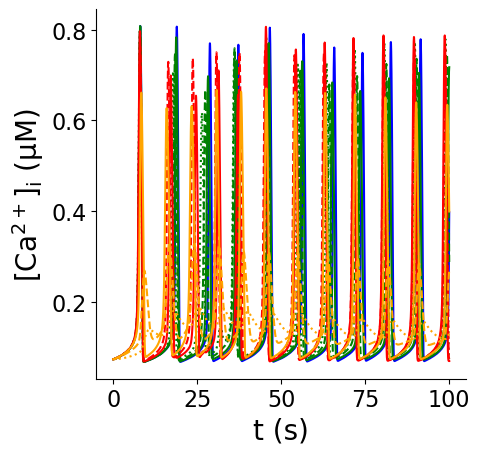

In [11]:
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

t = linspace(0, t_total, int(t_total/(dt*sample_rate)))

# line style
colors = ['b', 'g', 'g', 'g', 'r', 'r', 'orange', 'orange', 'orange']
ls = ['-', '-', '--', ':', '-', '--', '-', '--', ':']

labels = [1,2,3,4,5,6,7,8,9]
for i, ca_i in enumerate(Ca_i):
    ax.plot(t, 1000*ca_i, color = colors[i], ls = ls[i])
    
    
### Cosmetics ###
ax.tick_params(axis = 'both', which = 'both', labelsize = 16)
ax.set_xlabel('t (s)', fontsize = 20)
ax.set_ylabel(r'$\mathrm{[Ca^{2+}]_i~(\mu M)}$', fontsize = 20)

# Remove spines
for spine in ('top', 'right'): ax.spines[spine].set_visible(False)